# 数据分析并处理

In [15]:
import re
import pandas as pd
import numpy as np
import missingno as msno
# from sklearn import preprocessing

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

"""
    导入包后将数据集调出
    并且查看基本信息
"""
ini_data = pd.read_csv("train.csv",low_memory=False)  # 载入数据集
# ini_data.head(50)
ini_data.head(10)  # 简单查看整体数据

'\n    导入包后将数据集调出\n    并且查看基本信息\n'

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y,Y_1,136.0,150.0,offline,intermediate,9389.0,M,Matriculation,3.0,24.0,5.0,N,1.0,0
1,16523_44,T,T_1,131.0,44.0,offline,easy,16523.0,F,High School Diploma,4.0,26.0,2.0,N,3.0,1
2,13987_178,Z,Z_2,120.0,178.0,online,easy,13987.0,M,Matriculation,1.0,40.0,1.0,N,2.0,1
3,13158_32,T,T_2,117.0,32.0,offline,easy,13158.0,F,Matriculation,3.0,NaN,4.0,N,1.0,1
4,10591_84,V,V_3,131.0,84.0,offline,intermediate,10591.0,F,High School Diploma,1.0,42.0,2.0,N,4.0,1
5,12531_23,T,T_3,134.0,23.0,offline,intermediate,12531.0,F,High School Diploma,1.0,29.0,4.0,N,2.0,0
6,17874_144,Y,Y_2,120.0,144.0,online,easy,17874.0,M,Bachelors,2.0,48.0,3.0,N,3.0,1
7,8129_61,U,U_1,134.0,NaN,online,easy,8129.0,M,Matriculation,2.0,45.0,1.0,N,1.0,1
8,5652_57,U,U_1,134.0,57.0,offline,easy,5652.0,M,Matriculation,4.0,NaN,3.0,N,3.0,1
9,17019_153,Y,Y_1,136.0,153.0,offline,hard,17019.0,M,Bachelors,3.0,28.0,2.0,N,4.0,1


## 数据查看

In [16]:
# ini_data['age'].mean()
ini_data.describe()
ini_data.info()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,49323.000000,49273.000000,49259.000000,49298.000000,30619.000000,49306.000000,49226.000000,49998.000000
mean,128.229366,91.414345,9863.493128,2.249097,36.514256,2.583114,2.397818,0.696288
std,6.889967,51.307852,5716.490640,1.010896,9.045487,1.239399,1.326378,0.459864
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5051.500000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,91.000000,9665.000000,2.000000,40.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14618.000000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20097.000000,4.000000,63.000000,14.000000,5.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_num                     49998 non-null  object 
 1   program_type               49267 non-null  object 
 2   program_id                 49299 non-null  object 
 3   program_duration           49323 non-null  float64
 4   test_id                    49273 non-null  float64
 5   test_type                  49296 non-null  object 
 6   difficulty_level           49295 non-null  object 
 7   trainee_id                 49259 non-null  float64
 8   gender                     49291 non-null  object 
 9   education                  49296 non-null  object 
 10  city_tier                  49298 non-null  float64
 11  age                        30619 non-null  float64
 12  total_programs_enrolled    49306 non-null  float64
 13  is_handicapped             49280 non-null  obj

In [17]:
# ini_data.replace()
# ini_data = ini_data.dropna()

<AxesSubplot:>

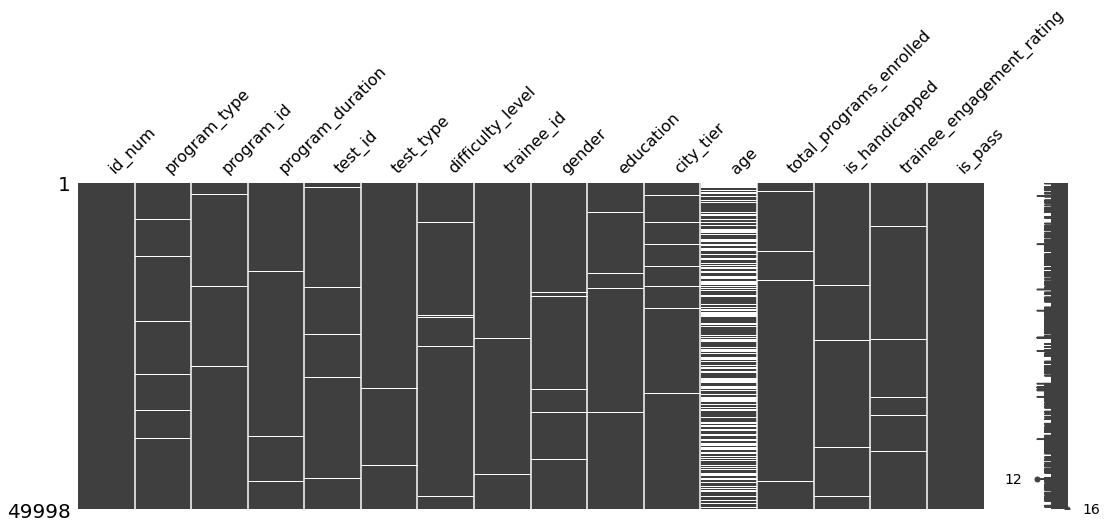

In [18]:
msno.matrix(ini_data, figsize=(18,6))  # 查看缺失分布情况

In [19]:
# #查看各特征属性简单出现频率

# ini_data.describe()
# ini_data.info()

# ini_data['program_type'].unique()
ini_data['program_type'].value_counts()  # 查看属性出现的个数 
# ini_data['education'].unique()
ini_data['education'].value_counts()
# ini_data['difficulty_level'].unique()
ini_data['difficulty_level'].value_counts()
# ini_data['is_handicapped'].unique()
ini_data['is_handicapped'].value_counts()
# ini_data['test_type'].unique()
ini_data['test_type'].value_counts()
# ini_data['education'].unique()
# ini_data['education'].value_counts()
# ini_data['total_programs_enrolled'].unique()
ini_data['total_programs_enrolled'].value_counts()
ini_data['gender'].value_counts()
print("-"*50)
# ini_data['gender'].unique()
# # a = 0
# a = 0
# for i in ini_data['city_tier']:
#     if i == 4:
#         a += 1
# print(a)
# ini_data['city_tier'].value_counts()
# with open("to_see.csv",'a',encoding='utf-8') as fi :
#    fi.write(str(ini_data[:].value_counts()))

Y    15227
T    12355
V     8747
U     5256
Z     4538
X     2263
S      881
Name: program_type, dtype: int64

High School Diploma    23161
Matriculation          17662
Bachelors               7795
Masters                  345
No Qualification         333
Name: education, dtype: int64

easy            26952
intermediate    13996
hard             6974
vary hard        1373
Name: difficulty_level, dtype: int64

N    44813
Y     4467
Name: is_handicapped, dtype: int64

offline    29432
online     19864
Name: test_type, dtype: int64

2.0     27232
4.0      9127
3.0      5255
1.0      5090
5.0      1137
6.0       980
7.0       188
8.0       181
9.0        52
10.0       23
12.0       19
14.0       13
11.0        9
Name: total_programs_enrolled, dtype: int64

M    26276
F    23015
Name: gender, dtype: int64

--------------------------------------------------


## 数据缺失值处理

In [20]:
# 这里因为年龄确实太多  不能直接dropna，
# 会严重影响其他特征的表现，所以将其填充
ini_data['age'] = ini_data['age'].fillna(ini_data['age'].mean())  
# 后来发现，缺失得太多，已经应项原本应有的平均值了

# ini_data['age']

# 将数值随机填补的原因是，数据多的分部的位置就大，
# 数据少的分部就少，随机填补利用这个原因也许是能够保留较好的原状
ini_data['program_type'] = ini_data['program_type'].fillna(method='ffill')
ini_data['trainee_engagement_rating'] = ini_data['trainee_engagement_rating'].fillna(method='ffill')
ini_data['is_handicapped'] = ini_data['is_handicapped'].fillna(method='bfill')
ini_data['education'] = ini_data['education'].fillna('High School Diploma')
ini_data['gender'] = ini_data['gender'].fillna(method='ffill')
ini_data['difficulty_level'] = ini_data['difficulty_level'].fillna(method='ffill')
ini_data['program_duration'] = ini_data['program_duration'].fillna(method='bfill')
ini_data['test_type'] = ini_data['test_type'].fillna(method='bfill')
ini_data['city_tier'] = ini_data['city_tier'].fillna(method='bfill')
ini_data['total_programs_enrolled'] = ini_data['total_programs_enrolled'].fillna(method='bfill')

# 因为这个值缺失不多 2占领了大多数,因此用2填充
ini_data['total_programs_enrolled'] = ini_data['total_programs_enrolled'].fillna(2.0) 

# 发现缺失 的id是和唯一id的后几个数是一样的
# 将id改为唯一id 的‘_’后边的数字,
obj = re.compile(r"(?<=_)\d+")
for x,i in enumerate(ini_data['test_id']):
    ini_data['test_id'][x] = np.float64(re.search(obj,ini_data['id_num'][x]).group())
# print(ini_data['test_id'][20])

# 学员id也需要这样补充
obj = re.compile(r"\d+(?=_)")
for x,i in enumerate(ini_data['trainee_id']):
    ini_data['trainee_id'][x] = np.float64(re.search(obj,ini_data['id_num'][x]).group())
# print(ini_data['trainee_id'][178])

# 剩下的内容缺失得比较少，所以可以删除缺失的那项
filledna_data = ini_data.dropna()


#         
# for x,i in enumerate(ini_data['test_id']):
#     if i != i:
#         ini_data['test.id'][x] = obj.match(ini_data['id_num'][x])
# math.isnan(ini_data['test_id'][8])
# a=0
# for i in ini_data['difficulty_level']:
#     if i == 'easy':
#         a += 1
# print(a)


<ipython-input-20-64551742a03a>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ini_data['test_id'][x] = np.float64(re.search(obj,ini_data['id_num'][x]).group())
<ipython-input-20-64551742a03a>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ini_data['trainee_id'][x] = np.float64(re.search(obj,ini_data['id_num'][x]).group())


In [21]:
# ini_data['test_id'][1:10]
# ini_data['trainee_id'][123:129]
# ini_data = ini_data.dropna()
# 查看保留的数据
filledna_data.describe()
filledna_data.info()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,49299.000000,49299.000000,49299.000000,49299.000000,49299.000000,49299.000000,49299.000000,49299.000000
mean,128.229579,91.454756,9865.424065,2.248017,36.513393,2.581006,2.398953,0.696546
std,6.890774,51.311295,5717.921191,1.010839,7.079693,1.237270,1.326259,0.459754
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5049.000000,1.000000,31.000000,2.000000,1.000000,0.000000
50%,131.000000,91.000000,9674.000000,2.000000,36.514256,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14619.000000,3.000000,43.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20097.000000,4.000000,63.000000,14.000000,5.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49299 entries, 0 to 49997
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_num                     49299 non-null  object 
 1   program_type               49299 non-null  object 
 2   program_id                 49299 non-null  object 
 3   program_duration           49299 non-null  float64
 4   test_id                    49299 non-null  float64
 5   test_type                  49299 non-null  object 
 6   difficulty_level           49299 non-null  object 
 7   trainee_id                 49299 non-null  float64
 8   gender                     49299 non-null  object 
 9   education                  49299 non-null  object 
 10  city_tier                  49299 non-null  float64
 11  age                        49299 non-null  float64
 12  total_programs_enrolled    49299 non-null  float64
 13  is_handicapped             49299 non-null  obj

In [22]:
# ini_data['program_type'] = ini_data['program_type'].dropna(axis=0,how='any')

In [23]:
# drop_na_data
# drop_na_data.info()
# drop_na_data.describe()

## 进行特征编码

### 对gender

In [24]:
"""
发现性别只有两种，可以01编码
"""
filledna_data.loc[filledna_data['gender'] == 'M', "gender"] = 0
filledna_data.loc[filledna_data['gender'] == 'F', "gender"] = 1
filledna_data['gender']

'\n发现性别只有两种，可以01编码\n'

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


0        0
1        1
2        0
3        1
4        1
        ..
49993    1
49994    1
49995    1
49996    0
49997    0
Name: gender, Length: 49299, dtype: object

In [25]:
# array(['Y', 'T', 'Z', 'V', 'U', 'X', 'S'], dtype=object)
# array(['Matriculation', 'High School Diploma', 'Bachelors',
#        'Masters', 'No Qualification'], dtype=object)

### 对program_type

In [26]:
# """
# program_type 有7中，若0，1，2，3...
# 编码会自动产生类型之间的距离，
# 而利用独热编码可以建立出多个属性彼此距离相等的条件
# 还多出更多特征，是值得考虑的方法，但数据挺多因此会消耗大量内存

# """
# encoder = preprocessing.OneHotEncoder()  # 初始化
# np.mat(drop_na_data['program_type']).shape
# 提取特征值属性并且编码
# 进行训练
# encoder.fit(np.array(filledna_data['program_type']).reshape(-1,1))  

#  进行拟合
# hot_prog_type1 = encoder.transform(np.array(filledna_data['program_type']).reshape(-1,1)).toarray()
# len(hot_prog_type1[0])
# hot_prog_type1[49200]
# filledna_data
    #     for x in 
#     filledna_data['program_type'] = hot_prog_type
#     filledna_data['program_type']
# filledna_data['program_type'].value_cvounts()
# filledna_data = pd.get_dummies(filledna_data['program_type'])
# type(hot_data_type)
# hot_data_type.shape
# h = pd.DataFrame(hot_data_type)
# h.shape
# len(drop_na_data['program_type'])
# len(h)
# len(hot_data_type)
# hot_data_type
# filledna_data['program_type'] = pd.DataFrame(hot_data_type.reshape(-1,7))
# filledna_data['program_type'] = h
？# drop_na_data['program_type']
# drop_na_data['program_type']
# drop_na_data['program_type']


'\nprogram_type 有7中，若0，1，2，3...\n编码会自动产生类型之间的距离，\n而利用独热编码可以建立出7个属性彼此距离相等的条件\n还多出更多特征，是值得考虑的方法，但数据挺多因此会消耗大量内存\n\n'

OneHotEncoder()

In [27]:
# 将原本的字母类型的属性删去，整列pop
# 等待之后合并新的特征
# filledna_data.pop('program_type')
# filledna_data.shape

# 获取新特征个数，充当要合并的columns的个数，进而将这个变么所得数值格式转为df，准备合并
# hot_prog_type1 = pd.DataFrame(hot_prog_type1, columns=['program_type']*len(hot_prog_type1[0]))
# hot_prog_type1.shape
# filledna_data = filledna_data.join(hot_prog_type)

"""
后来改变了思路，因为上边的方法必须drop掉一些，一是导致数据减少；
二是后来选择特征时发现分散的好几个并没有对结果有多大的相关性，
因此去掉，换这种编码方式。
"""
filledna_data.loc[filledna_data['program_type'] == 'S', "program_type"] = 0
filledna_data.loc[filledna_data['program_type'] == 'T', "program_type"] = 1
filledna_data.loc[filledna_data['program_type'] == 'U', "program_type"] = 2
filledna_data.loc[filledna_data['program_type'] == 'V', "program_type"] = 3
filledna_data.loc[filledna_data['program_type'] == 'W', "program_type"] = 4
filledna_data.loc[filledna_data['program_type'] == 'X', "program_type"] = 5
filledna_data.loc[filledna_data['program_type'] == 'Y', "program_type"] = 6
filledna_data.loc[filledna_data['program_type'] == 'Z', "program_type"] = 7

0        Y
1        T
2        Z
3        T
4        V
        ..
49993    Y
49994    U
49995    T
49996    Y
49997    X
Name: program_type, Length: 49299, dtype: object

(49299, 15)

(49299, 7)

In [33]:
# 进行横向合并
"""
这里要和merge 进行区别
merge:是寻找完全相同的列，把相同的列当作索引进行拼接，默认内连接形成合并
join:无需完全相同的列，可以直接按照索引连接
"""
# filledna_data = filledna_data.join(hot_prog_type1)
# filledna_data[48850:49260]

'\n这里要和merge 进行区别\nmerge:是寻找完全相同的列，把相同的列当作索引进行拼接，默认内连接形成合并\njoin:无需完全相同的列，可以直接按照索引连接\n'

In [32]:
# 发现这一条后边的数据全部都出错了，可能是内存不够？
# filledna_data['program_type'][4863:4880]

,program_type,program_type,program_type,program_type,program_type,program_type,program_type
4926,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4927,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4928,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4929,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4930,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4931,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4932,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4933,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4934,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4935,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [72]:
# 内存不够？只能清除掉了
# filledna_data = filledna_data.dropna()
# filledna_data['program_type'][:]

### 对学历进行编码（有等级）

In [73]:
# 有等级的，采用有距离体现的编码
filledna_data.loc[filledna_data['education'] == 'No Qualification', "education"] = 0
filledna_data.loc[filledna_data['education'] == 'High School Diploma', "education"] = 1
filledna_data.loc[filledna_data['education'] == 'Matriculation', "education"] = 2
filledna_data.loc[filledna_data['education'] == 'Bachelors', "education"] = 3
filledna_data.loc[filledna_data['education'] == 'Masters', "education"] = 4
filledna_data['education']

0        2
1        1
2        2
3        2
4        1
        ..
49993    1
49994    1
49995    1
49996    2
49997    2
Name: education, Length: 49299, dtype: object

### 对测试类型编码

In [74]:
filledna_data.loc[filledna_data['test_type'] == 'offline', "test_type"] = 0
filledna_data.loc[filledna_data['test_type'] == 'online', "test_type"] = 1
filledna_data['test_type']

0        0
1        0
2        1
3        0
4        0
        ..
49993    0
49994    0
49995    1
49996    0
49997    0
Name: test_type, Length: 49299, dtype: object

### 对难度级别进行编码

In [75]:
filledna_data.loc[filledna_data['difficulty_level'] == 'easy', "difficulty_level"] = 0
filledna_data.loc[filledna_data['difficulty_level'] == 'intermediate', "difficulty_level"] = 1
filledna_data.loc[filledna_data['difficulty_level'] == 'hard', "difficulty_level"] = 2
filledna_data.loc[filledna_data['difficulty_level'] == 'vary hard', "difficulty_level"] = 3
filledna_data['difficulty_level']

0        1
1        0
2        0
3        0
4        1
        ..
49993    2
49994    1
49995    0
49996    1
49997    2
Name: difficulty_level, Length: 49299, dtype: object

In [76]:
# 查看是否成功
filledna_data['difficulty_level'].value_counts()
filledna_data.info()

0    26951
1    13985
2     6988
3     1375
Name: difficulty_level, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49299 entries, 0 to 49997
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_num                     49299 non-null  object 
 1   program_type               49299 non-null  object 
 2   program_id                 49299 non-null  object 
 3   program_duration           49299 non-null  float64
 4   test_id                    49299 non-null  float64
 5   test_type                  49299 non-null  object 
 6   difficulty_level           49299 non-null  object 
 7   trainee_id                 49299 non-null  float64
 8   gender                     49299 non-null  object 
 9   education                  49299 non-null  object 
 10  city_tier                  49299 non-null  float64
 11  age                        49299 non-null  float64
 12  total_programs_enrolled    49299 non-null  float64
 13  is_handicapped             49299 non-null  obj

### 对是否残疾编码

In [77]:
filledna_data.loc[filledna_data['is_handicapped'] == 'N', "is_handicapped"] = 1
filledna_data.loc[filledna_data['is_handicapped'] == 'Y', "is_handicapped"] = 0
filledna_data['is_handicapped']

0        1
1        1
2        1
3        1
4        1
        ..
49993    1
49994    1
49995    1
49996    1
49997    1
Name: is_handicapped, Length: 49299, dtype: object

### 对programid编码
由于分开中来太多，导致了很多数据都变成NaN,决定放弃该类数据

In [78]:
# encoder.fit(np.array(filledna_data['program_id']).reshape(-1,1))
# hot_prog_type1 = encoder.transform(np.array(filledna_data['program_id']).reshape(-1,1)).toarray()
# len(hot_prog_type1[0])
# filledna_data.pop('program_id')
# filledna_data.shape
# hot_prog_type1 = pd.DataFrame(hot_prog_type1, columns=['program_id']*len(hot_prog_type1[0]))
# hot_prog_type1.shape
# # filledna_data = filledna_data.join(hot_prog_type)

In [79]:
# filledna_data = filledna_data.join(hot_prog_type1)

In [80]:
# filledna_data

In [81]:
filledna_data.pop('program_id')

0        Y_1
1        T_1
2        Z_2
3        T_2
4        V_3
        ... 
49993    Y_4
49994    U_1
49995    T_2
49996    Y_4
49997    X_1
Name: program_id, Length: 49299, dtype: object

In [82]:
filledna_data

,id_num,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,6,136.0,150.0,0,1,9389.0,0,2,3.0,24.000000,5.0,1,1.0,0
1,16523_44,1,131.0,44.0,0,0,16523.0,1,1,4.0,26.000000,2.0,1,3.0,1
2,13987_178,7,120.0,178.0,1,0,13987.0,0,2,1.0,40.000000,1.0,1,2.0,1
3,13158_32,1,117.0,32.0,0,0,13158.0,1,2,3.0,36.514256,4.0,1,1.0,1
4,10591_84,3,131.0,84.0,0,1,10591.0,1,1,1.0,42.000000,2.0,1,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49993,4379_115,6,121.0,115.0,0,2,4379.0,1,1,2.0,36.514256,5.0,1,4.0,1
49994,3809_58,2,117.0,58.0,0,1,3809.0,1,1,3.0,30.000000,2.0,1,3.0,1
49995,18109_42,1,117.0,42.0,1,0,18109.0,1,1,2.0,41.000000,2.0,1,1.0,1
49996,6384_113,6,121.0,113.0,0,1,6384.0,0,2,3.0,36.514256,2.0,1,5.0,1


In [83]:
# 暂时转存
filledna_data.to_csv('waitfor_FE_programtypeset.csv',encoding='utf-8')

In [84]:
# 数据的简单处理完毕